# Proyecto: Clasificación de Barcos y XCeption

### Problema a Resolver: ¿Podemos clasificar navios usando una red neuronal preentrenada?

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

D:\anaconda3\envs\new-tf-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\envs\new-tf-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda3\envs\new-tf-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\anaconda3\envs\new-tf-gpu\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Path = "../Practica_5/" #Depende de la ruta en tu máquina

### Hay 8932 imágenes en el conjunto de datos. 6252 de las imágenes están separadas para el entrenamiento y solo esas imágenes están etiquetadas.

### Se utilizarán esas 6252 imágenes etiquetadas y se dividirán como datos de entrenamiento, validación y prueba.

### En la primera parte, se importa el archivo csv que contiene los nombres de las imágenes y las categorías de barcos correspondientes.

In [3]:
data_csv = pd.read_csv(Path + 'train/train.csv')
print('Data shape: ', data_csv.shape)

categories = {0: 'Cargo', 1:'Military', 2:'Carrier', 3:'Cruise', 4:'Tankers'}

# I want classes to start from 0. So I subtracted 1 from the categories
data_csv['category'] = data_csv['category'] - 1
data_csv['label'] = data_csv['category'].map(categories)
data_csv['label']  = pd.Categorical(data_csv['label'])
data_csv.head(5)

Data shape:  (6252, 2)


,image,category,label
0,2823080.jpg,0,Cargo
1,2870024.jpg,0,Cargo
2,2662125.jpg,1,Military
3,2900420.jpg,2,Carrier
4,2804883.jpg,1,Military


### Revisaremos la distribución de las imágenes a través de las 5 categorías que se nos están presentando

D:\anaconda3\envs\new-tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


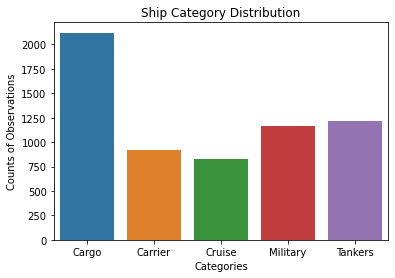

In [4]:
sns.countplot(data_csv['label'])
plt.title('Ship Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Counts of Observations');

### Como se puede ver en el gráfico, el conjunto de datos no se distribuye equitativamente entre las categorías. No se modifiracrán las cantidades de imágenes en el conjunto de datos, usaremos todas las imágenes para el entrenamiento

In [5]:
import cv2

### Usaremos cv2, un módulo de Pyton para usar OpenCV (Open Source Computer Vision Library)  es una biblioteca que contiene más de 2,500 algoritmos optimizados para procesamiento de imágenes y visión por computadora.

### cv2 nos permite manipular imágenes; leerlas, escribirlas, transformarlas (rotaciones, redimensiones, aplicación de filtros)

### Vamos a definir un la ruta de los datos para poder acceder a ellos

In [6]:
path = r'C:\Users\brugi\Documents\Diplomado\ejercicios\Practica_5\train\images'

In [7]:
path

'C:\\Users\\brugi\\Documents\\Diplomado\\ejercicios\\Practica_5\\train\\images'

### Luego, cada nombre de imagen del archivo csv se extrae en un bucle y se lee la imagen correspondiente.

### Posteriormente, cada imagen se convierte a formato RGB y se cambia su tamaño para que tenga las mismas dimensiones.

### Por último, cada imagen se guarda en una lista en formato de matriz Numpy.

In [8]:
img_list = list(data_csv['image'])

data_img = []

for each in img_list:
        # Each image path
    each_path = os.path.join(path, each)
        # Read each image
    each_img = cv2.imread(each_path, cv2.IMREAD_UNCHANGED)
        # OpenCv default color is BGR. Convert it to RGB
    each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
        # Resize the images
    each_img_resized = cv2.resize(each_img, (75,75))
        # Save arrays to a list
    data_img.append(each_img_resized)

# Converting list to numpy array
X = np.array(data_img)
print('Shape of X: ', X.shape)

Shape of X:  (6252, 75, 75, 3)


### Al final se extraen las etiquetas del archivo csv y se aplica One Hot Enconder para tener una caracteristica de destino. 

### El OneHotEncoder transforma variables categóricas en un formato que puede ser interpretado por modelos de aprendizaje automático. Específicamente, convierte cada categoría en un vector binario único (one-hot encoding), donde cada vector tiene un valor de 1 en la posición correspondiente a la categoría presente y 0 en todas las demás posiciones. https://docs.google.com/spreadsheets/d/1sNNfPTc6GC00zH2xPYmQl-inLU_5P-h_wCziYPS71g8/edit?usp=sharing

In [9]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(data_csv['category'].values.reshape(-1,1))
print('Shape of y: ', y.shape)

Shape of y:  (6252, 5)


### Sacamos imágenes aleatorias de nuestro conjunto

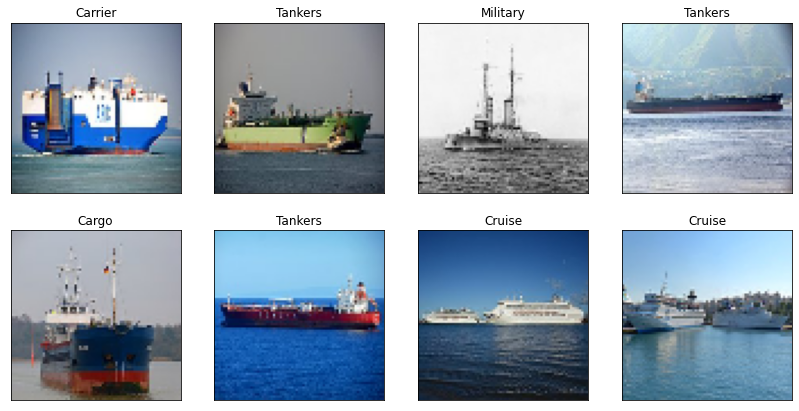

In [10]:
indices = np.random.randint(0,6252,8) 
i = 1
plt.figure(figsize=(14,7))
for each in indices:
    plt.subplot(2,4,i)
    plt.imshow(X[each])
    plt.title(data_csv['label'].loc[each])
    plt.xticks([])
    plt.yticks([])
    i += 1

# División de entrenamiento, validación y prueba

### El conjunto de datos se divide en divisiones de entrenamiento, validación y prueba.

In [11]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape:  (4251, 75, 75, 3)
y_train shape:  (4251, 5)
X_val shape  :  (1063, 75, 75, 3)
y_val shape  :  (1063, 5)
X_test shape :  (938, 75, 75, 3)
y_test shape :  (938, 5)


# Aumento de datos (Data Augmentation)

### El aumento de datos se aplica a los datos de entrenamiento y validación. Con la ayuda del aumento de datos, el modelo se alimenta con imágenes aleatorias con diferencias aleatorias. De esa forma, el modelo se entrena con más datos.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)

validation_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)

train_gen.fit(X_train)
validation_gen.fit(X_val)

# Construyendo el Modelo usando Xception

### En lugar de crear un modelo CNN personalizado, se utiliza el modelo Xception previamente entrenado como nuestro modelo base.

### Xception es una red neuronal convolucional con 71 capas de profundidad. Es una evolución de la arquitectura Inception desarrollada por Google, que introdujo la idea de usar bloques de convolución que combinan múltiples tamaños de filtro en paralelo.

### Preentrenada con más de un millón de imágenes desde la base de datos de ImageNet. La red puede clasificar imágenes en 1000 categorías de objetos.

### La red ha aprendido representaciones ricas en características para una amplia gama de imágenes. El tamaño de la entrada de imagen de la red es de 299 por 299

### Xception, al ser solo capas de convoluciones, separa el proceso en dos pasos: una convolución por canal (depthwise) seguida de una convolución de punto (pointwise). 

### La convolución depthwise extrae características dentro de cada canal de forma independiente.
### La convolución pointwise mezcla estas características para obtener una representación final combinada.

### Esta separación de convoluciones permite que el procesamiento sea más lihero y eficiente sin sacrificar rendimiento.

#### Importamos las clases para contruir el modelo, las capas y la arquitectura preentrenada de Xception, así como el optimizador Adam

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

#### Definimos el tamaño de batch usado por época y las épocas para el entrenamiento

In [14]:
batch_size = 100
epochs = 15

### Definimos el modelo preentrenado (base)

#### Cargamos el modelo de Xception PERO le vamos a quitar la capa de clasificación original, indicamos que use los pesos preentrenados en el dataset de ImageNet y establecemos el tamaño de las imágenes de entrada (75 x 75) con los 3 canales de color (RGB)

### Agregamos la capa final (head)

#### Tomamos la salida del modelo base y le aplicamos una capa de GlobalAveragePooling2D para reducir la dimensionalidad de las características extraídas.

#### Se añade una capa densa con 5 unidades y activación softmax para la clasificación final en 5 clases.

In [15]:
base = Xception(include_top=False, weights='imagenet', input_shape=(75,75,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(5, activation='softmax')(x)

### El modelo final se crea combinando el modelo base y la "cabeza" personalizada (head).

In [16]:
model = Model(inputs=base.input, outputs=head)

### Podemos ver la estructura completa de la red neuronal (opcional)

In [17]:
#model.summary()

### Compilación del Modelo

#### Se compila el modelo utilizando el optimizador Adam con una tasa de aprendizaje (lr) de 0.0001.

#### La función de pérdida es categorical_crossentropy, adecuada para tareas de clasificación multiclase.

#### Se monitoriza la precisión (accuracy) como métrica de rendimiento.

In [18]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

# Fitting the model with train and validation augmented datasets.
history = model.fit(train_gen.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = validation_gen.flow(X_val, y_val, batch_size=batch_size),
                              steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/15
42/42 [==============================] - 38s 718ms/step - loss: 1.4366 - accuracy: 0.3859 - val_loss: 1.5522 - val_accuracy: 0.3885
Epoch 2/15
42/42 [==============================] - 26s 621ms/step - loss: 1.1035 - accuracy: 0.5591 - val_loss: 1.1394 - val_accuracy: 0.5325
Epoch 3/15
42/42 [==============================] - 27s 629ms/step - loss: 0.8813 - accuracy: 0.6500 - val_loss: 0.9443 - val_accuracy: 0.6030
Epoch 4/15
42/42 [==============================] - 26s 623ms/step - loss: 0.7695 - accuracy: 0.6904 - val_loss: 0.7663 - val_accuracy: 0.6830
Epoch 5/15
42/42 [==============================] - 26s 620ms/step - loss: 0.6814 - accuracy: 0.7314 - val_loss: 0.7085 - val_accuracy: 0.7140
Epoch 6/15
42/42 [==============================] - 27s 640ms/step - loss: 0.6303 - accuracy: 0.7521 - val_loss: 0.7256 - val_accuracy: 0.7168
Epoch 7/15
42/42 [==============================] - 27s 636ms/step - loss: 0.6121 - accuracy: 0.7548 - val_loss: 0.6784 - val_accuracy: 0.7262

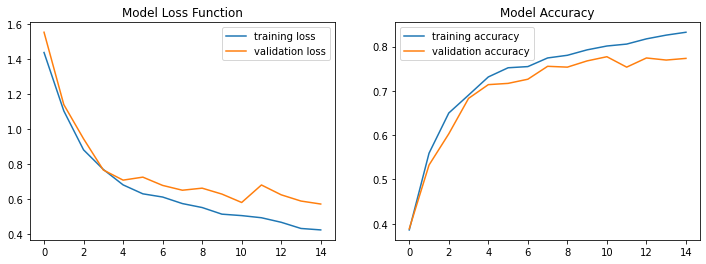

In [19]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend();

30/30 [==============================] - 4s 74ms/step


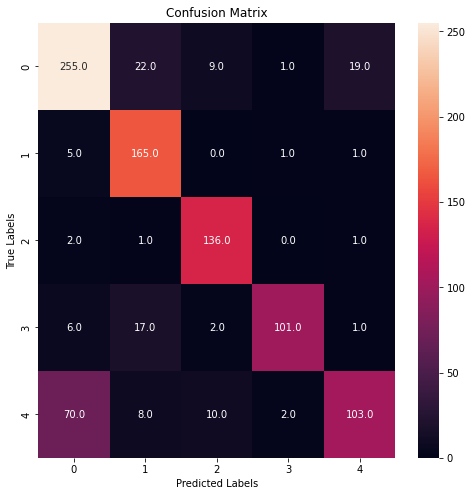

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predicting labels from X_test data
y_pred = model.predict(X_test)

# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)

# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)

# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

In [21]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       306
           1       0.77      0.96      0.86       172
           2       0.87      0.97      0.92       140
           3       0.96      0.80      0.87       127
           4       0.82      0.53      0.65       193

    accuracy                           0.81       938
   macro avg       0.84      0.82      0.82       938
weighted avg       0.82      0.81      0.80       938



In [22]:
path_2 = r'C:\Users\brugi\Documents\Diplomado\ejercicios\Practica_5\train\test_ApKoW4T.csv'
test_img = pd.read_csv(path_2)
sample_img = test_img.sample(5)

# List of image names
img_list = list(sample_img['image'])

sample_img_data = []

for each in img_list:
    # Each images' path
    each_path = os.path.join(path, each)
    # Read each image
    each_img = cv2.imread(each_path)
    # OpenCv default color is BGR. Convert it to RGB
    each_img = cv2.cvtColor(each_img, cv2.COLOR_BGR2RGB)
    # Resize the images
    each_img_resized = cv2.resize(each_img, (128,128))
    # Save arrays to a list
    sample_img_data.append(each_img_resized)

# Converting list to numpy array
sample_img_data = np.array(sample_img_data)
print('Shape of X: ', sample_img_data.shape)

Shape of X:  (5, 128, 128, 3)


1/1 [==============================] - 3s 3s/step


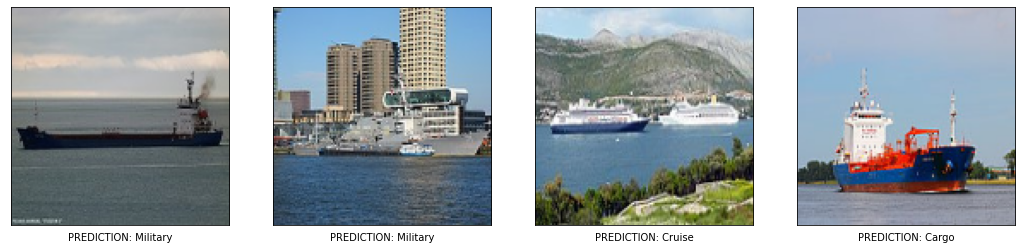

In [23]:
# Predicting random 5 images
sample_pred = model.predict(sample_img_data)
sample_classes = np.argmax(sample_pred, axis = 1)

# Visualizing the predictions
i = 0
plt.figure(figsize=(18,9))
for each in range(4):
    i += 1
    plt.subplot(2,4,i)
    plt.imshow(sample_img_data[each])
    plt.xlabel('PREDICTION: ' + str(categories[sample_classes[each]]))
    plt.xticks([])
    plt.yticks([])